# Yulu Bike Sharing - Hypothesis Testing

## Problem Statement
Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.

In this case study, we'll try to find out what are the factors which are impacting the revenue of Yulu. For this we'll be using data analysis techniques like univariate, bivariate analysis. Apart from that we'll do some hypothesis testing for get answers to the following questions
- Which variables are significant in predicting the demand for shared electric cycles in the Indian market?
- How well those variables describe the electric cycle demands


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import lognorm,f_oneway,chi2_contingency
import statsmodels.api as sm
import scipy.stats as stats
import pylab

In [3]:
df = pd.read_csv('bike_sharing.txt')

In [4]:
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [5]:
df.shape

(10886, 12)

In [6]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [8]:
df['season'].value_counts(normalize=True)

4    0.251148
2    0.251056
3    0.251056
1    0.246739
Name: season, dtype: float64

In [9]:
df['holiday'].value_counts(normalize=True)

0    0.971431
1    0.028569
Name: holiday, dtype: float64

In [10]:
df['workingday'].value_counts(normalize=True)

1    0.680875
0    0.319125
Name: workingday, dtype: float64

In [11]:
df['weather'].value_counts(normalize=True)

1    0.660665
2    0.260334
3    0.078909
4    0.000092
Name: weather, dtype: float64

## Univariate Analysis

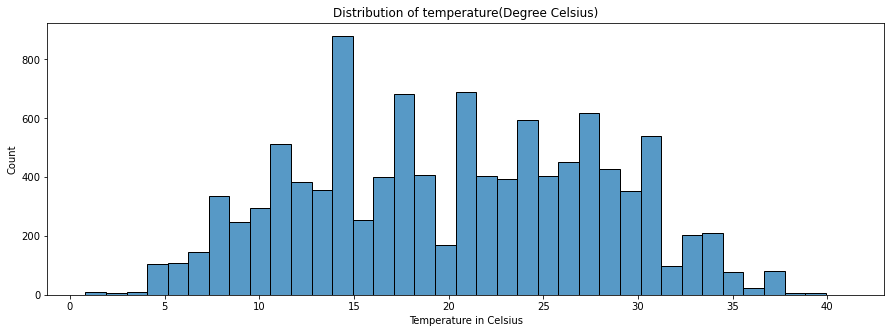

In [12]:
plt.figure(figsize=(15,5))
sns.histplot(x=df['temp'])
plt.title("Distribution of temperature(Degree Celsius)")
plt.xlabel("Temperature in Celsius")
plt.show()

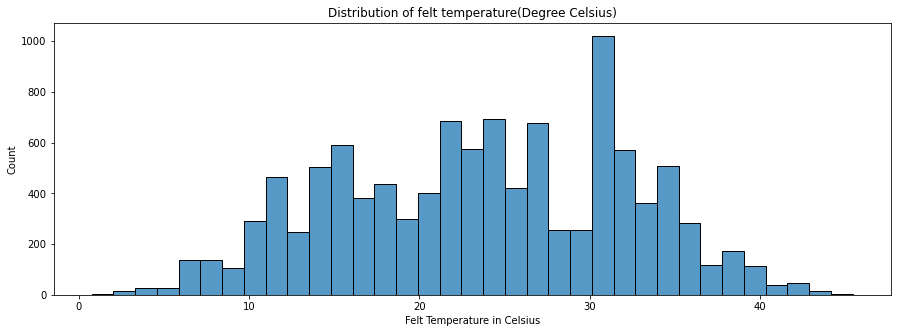

In [13]:
plt.figure(figsize=(15,5))
sns.histplot(x=df['atemp'])
plt.title("Distribution of felt temperature(Degree Celsius)")
plt.xlabel("Felt Temperature in Celsius")
plt.show()

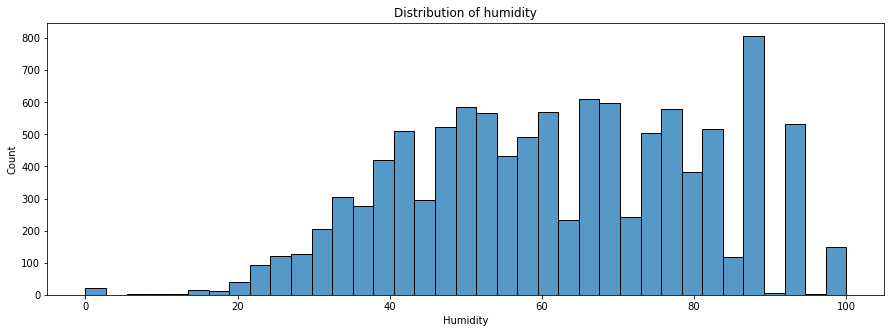

In [14]:
plt.figure(figsize=(15,5))
sns.histplot(x=df['humidity'])
plt.title("Distribution of humidity")
plt.xlabel("Humidity")
plt.show()

<Figure size 1080x360 with 0 Axes>

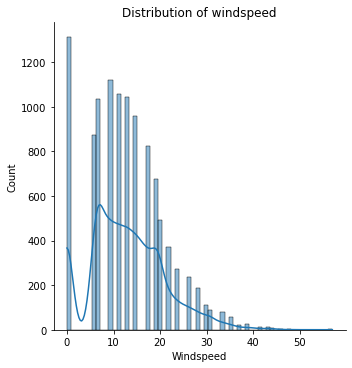

In [15]:
plt.figure(figsize=(15,5))
sns.displot(x=df['windspeed'],kde=True)
plt.title("Distribution of windspeed")
plt.xlabel("Windspeed")
plt.show()

<Figure size 1080x720 with 0 Axes>

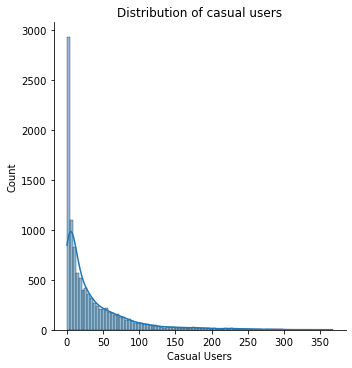

In [16]:
plt.figure(figsize=(15,10))
sns.displot(x=df['casual'],kde=True)
plt.title("Distribution of casual users")
plt.xlabel("Casual Users")
plt.show()

<Figure size 1080x360 with 0 Axes>

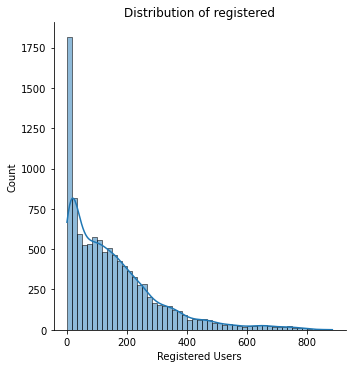

In [17]:
plt.figure(figsize=(15,5))
sns.displot(x=df['registered'],kde=True)
plt.title("Distribution of registered")
plt.xlabel("Registered Users")
plt.show()

<Figure size 1080x360 with 0 Axes>

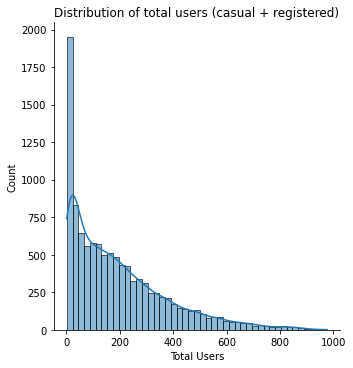

In [18]:
plt.figure(figsize=(15,5))
sns.displot(x=df['count'],kde=True)
plt.title("Distribution of total users (casual + registered)")
plt.xlabel("Total Users")
plt.show()

## Bivariate Analysis

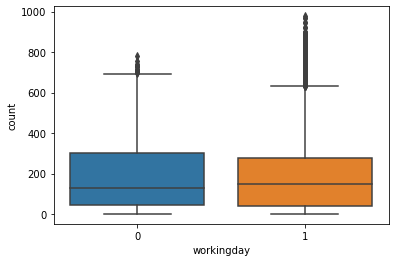

In [19]:
sns.boxplot(x='workingday',y='count',data=df)
plt.show()

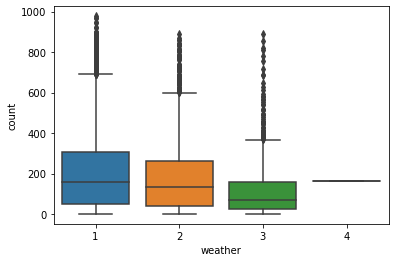

In [20]:
sns.boxplot(x='weather',y='count',data=df)
plt.show()

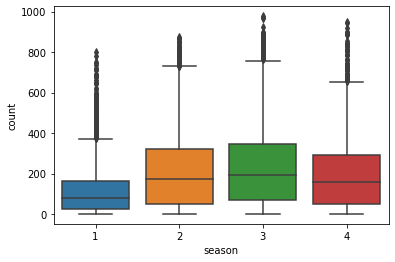

In [21]:
sns.boxplot(x='season',y='count',data=df)
plt.show()

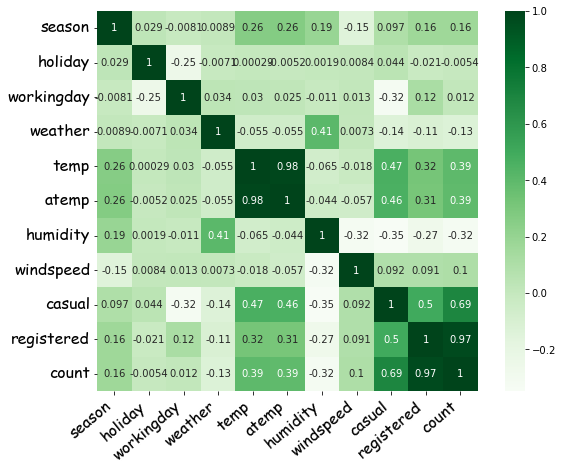

In [22]:
plt.figure(figsize = (10, 7))
ax = sns.heatmap(df.corr(),
            annot=True,cmap='Greens',square=True)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=40,fontsize=16,family = "Comic Sans MS",
    horizontalalignment='right')

ax.set_yticklabels(
    ax.get_yticklabels(),
    rotation=0,fontsize=16,family = "Comic Sans MS",
    horizontalalignment='right')
    
plt.show()

<div class="alert alert-block alert-info">
<b>Comments:</b> 
- From the above analysis we can say that there are no outliers in the system that needs to be treated
-We can see from the correlation graph above that temp and atemp are highly correlated also registed and count are highly correlated.Apart from that there is no significant correlation between variables.
- In the univariate analysis we can see that season and weather impact the number of vehicles rented
</div>


# Hypothesis Testing

## 2-sample T-test to check if working day has an effect on number of vehicles rented

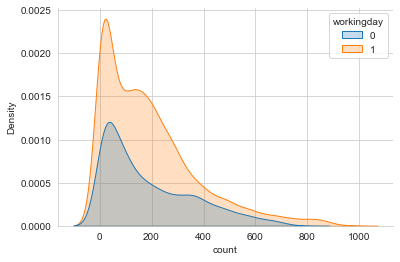

In [23]:
## Visual Analysis
sns.set_style('whitegrid')
sns.kdeplot(data=df, x='count', hue='workingday', fill=True)
sns.despine()
plt.show()


<div class="alert alert-block alert-info">
<b>Observation:</b> From the above plot it is clear that the distribution is not normal for both the groups. Also we can see that the working day has more number of users in comparison to non working users. We need to check this hypothesis using hypothesis testing techniques.
</div>

### Assumptions
* Both groups are independent
* Both groups are obtained through random sampling
* Data in each group is normally distributed
* variance of both the groups should be similar
* By visual analysis we can see that the data is not normally distributed for both groups(i.e workingday and non workingday)

### Hypothesis Formulation and test selection
- We'll have the following hypothesis
    - Null Hypothesis: There is no impact of working day on number of rental vehicles
    - Alternate Hypothesis: There is an impact of working day on number of rental venhicles
    - We'll consider the significance value as 5% and perform a two tailed test
- Test Selection
    - We'll use 2 sample T-test since we need to compare mean of two independendent group. The 2 sample t-test behaves similar to 2 sample z-test for large dataset(i.e. n>30)

### Checking Test assumptions
- We know that both groups are independent of each other since each individual renting a vehicle is independent.
- We assume that both the groups are obtained from random sampling
- Data in each group is normally distributed - This assumption breaks as we have seen in the above plot. We need to apply a log transform to convert it to gaussian.
- Variance of both the groups must be similar. Below we'll see that the variance is somewhat similar for both groups

In [24]:
working_day_count = df[df['workingday']==1]['count']
non_working_day_count = df[df['workingday']==0]['count']

In [25]:
working_day_count_variance = np.var(working_day_count)
non_working_day_count_variance = np.var(non_working_day_count)
print("variance of working day is {} and variance of non working day is {}".format(working_day_count_variance,non_working_day_count_variance))

variance of working day is 34040.697106746935 and variance of non working day is 30171.34609894243


### Applying Log normal transformation to convert the data to gaussian

In [26]:
def normality(data):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    sns.kdeplot(data)
    plt.subplot(1,2,2)
    stats.probplot(data,plot=pylab)
    plt.show()

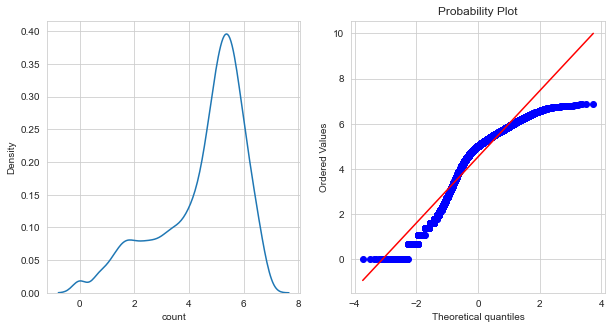

In [27]:
working_day_count_transformed = np.log(working_day_count)
non_working_day_count_transformed = np.log(non_working_day_count)
normality(working_day_count_transformed)

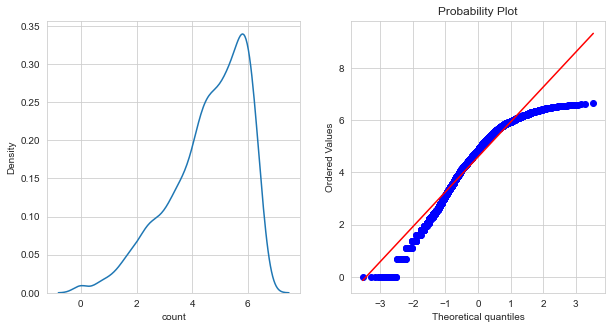

In [28]:
normality(non_working_day_count_transformed)

### Calculating p-value using 2 sample t-test for independenet variables

In [29]:
stats.ttest_ind(working_day_count_transformed,non_working_day_count_transformed)

Ttest_indResult(statistic=-1.8913669049596848, pvalue=0.05860191030754906)

<div class="alert alert-block alert-success">
<b>Conclusion:</b> Based on above result p-value = 0.0586 which is greater than our significance value alpha. So based on this
    We can say that we fail to reject the Null Hypothesis. It means that there is no impact of working days on number of vehicles rented.
    - Note: Since the p-value is slightly greater than our alpha value, it would be better to collect more data to have more confidence on our results.
</div>

## ANOVA to check if number of cycles rented is similar or different in different 1. season 2. weather

### ANOVA to check impact of season on rented vehicles

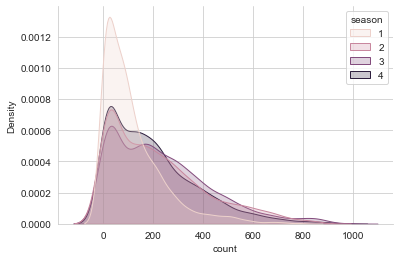

In [30]:
## visual Analysis
sns.set_style('whitegrid')
sns.kdeplot(data=df, x='count', hue='season', fill=True)
sns.despine()
plt.show()


<div class="alert alert-block alert-info">
<b>Observation:</b> From the above plot we can observe that all the plots are not normally distributed, we'll confirm this using qq-plot. Also we can see that that there is not much evidence from the plot whether season has an impact on number of vehicles rented.We'll check this using hypothesis testing.
</div> 

### Assumptions
* All the groups are independent.
* Each group has a normal distribution.From above plot it is clear that group are not gaussian
* Variance of groups should be same.


### Hypothesis Formulation and test selection
- We'll have the following hypothesis
    - Null Hypothesis: There is no impact of season on number of rental vehicles
    - Alternate Hypothesis: There is an impact of season on number of rental venhicles.
    - We'll consider the significance value as 5% and perform a two tailed test.
- Test Selection
    - We'll use 2 sample ANOVA since we need to compare mean of multiple groups.

### Checking Test assumptions
- We know that all groups are independent of each other since each individual renting a vehicle is independent.
- Data in each group is normally distributed - This assumption breaks as we have seen in the above plot. We need to apply a log transform to convert it to gaussian.
- Variance of both the groups must be similar. Below we'll see that the variance is not similar for all groups.

In [31]:
no_of_users_in_summer = df[df['season']==2]['count']
no_of_users_in_spring = df[df['season']==1]['count']
no_of_users_in_fall = df[df['season']==3]['count']
no_of_users_in_winter = df[df['season']==4]['count']

In [32]:
variance_in_summer = np.var(no_of_users_in_summer)
variance_in_spring = np.var(no_of_users_in_spring)
variance_in_fall = np.var(no_of_users_in_fall)
variance_in_winter = np.var(no_of_users_in_winter)
print("variance amoung users in summer: {}".format(variance_in_summer))
print("variance amoung users in spring: {}".format(variance_in_spring))
print("variance amoung users in fall: {}".format(variance_in_fall))
print("variance amoung users in winter: {}".format(variance_in_winter))

variance amoung users in summer: 36853.522249306436
variance amoung users in spring: 15687.725805298045
variance amoung users in fall: 38854.29508913101
variance amoung users in winter: 31538.180550642683


### Applying Log normal transformation to convert the data to gaussian

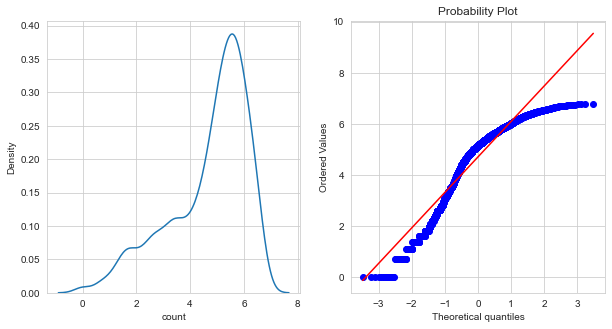

In [33]:
no_of_users_in_summer_transformed = np.log(no_of_users_in_summer)
no_of_users_in_spring_transformed = np.log(no_of_users_in_spring)
no_of_users_in_fall_transformed = np.log(no_of_users_in_fall)
no_of_users_in_winter_transformed = np.log(no_of_users_in_winter)
normality(no_of_users_in_summer_transformed)

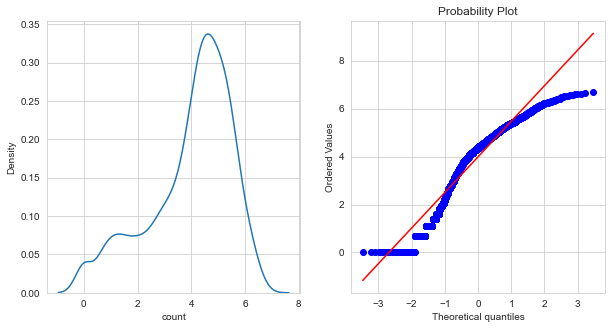

In [34]:


normality(no_of_users_in_spring_transformed)

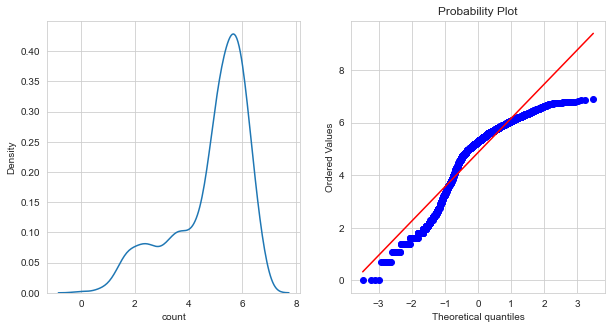

In [35]:


normality(no_of_users_in_fall_transformed)

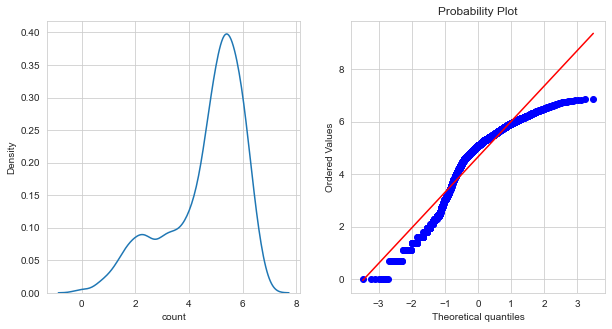

In [36]:
normality(no_of_users_in_winter_transformed)

### Calculating p-value using ANOVA for season

In [37]:
f_oneway(no_of_users_in_summer_transformed,no_of_users_in_spring_transformed,no_of_users_in_fall_transformed,no_of_users_in_winter_transformed)

F_onewayResult(statistic=192.44768979509675, pvalue=1.3071364586238867e-121)

<div class="alert alert-block alert-success">
<b>Conclusion:</b> Based on above result p-value = 1.30^(-121) which is much smaller than our significance value alpha. So based on this
    We can say that we reject the Null Hypothesis. It means that there is an impact of season on number of vehicles rented.
</div>

### ANOVA to check impact of weather on rented vehicles


/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


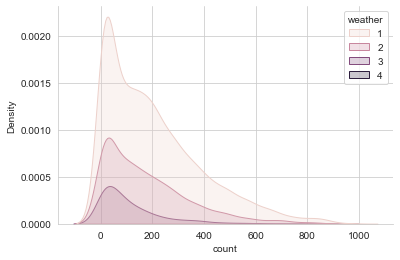

In [50]:
## visual Analysis
sns.set_style('whitegrid')
sns.kdeplot(data=df, x='count', hue='weather', fill=True)
sns.despine()
plt.show()


<div class="alert alert-block alert-info">
<b>Observation:</b> From the above plot we can observe that all the plots are not normally distributed, we'll confirm this using qq-plot. Also we can see that that there is not much evidence from the plot whether weather has an impact on number of vehicles rented.We'll check this using hypothesis testing.
</div> 

### Hypothesis Formulation and test selection
- We'll have the following hypothesis
    - Null Hypothesis: There is no impact of weather on number of rental vehicles
    - Alternate Hypothesis: There is an impact of weather on number of rental venhicles.
    - We'll consider the significance value as 5% and perform a two tailed test.
- Test Selection
    - We'll use 2 sample ANOVA since we need to compare mean of multiple groups.

### Checking Test assumptions
- We know that all groups are independent of each other since each individual renting a vehicle is independent.
- Data in each group is normally distributed - This assumption breaks as we have seen in the above plot. We need to apply a log transform to convert it to gaussian.
- Variance of both the groups must be similar. Below we'll see that the variance is not similar for all groups.

In [39]:
no_of_users_in_weather_1 = df[df['weather']==1]['count']
no_of_users_in_weather_2 = df[df['weather']==2]['count']
no_of_users_in_weather_3 = df[df['weather']==3]['count']
no_of_users_in_weather_4 = df[df['weather']==4]['count']


In [40]:
variance_in_no_of_users_in_weather_1 = np.var(no_of_users_in_weather_1)
variance_in_no_of_users_in_weather_2 = np.var(no_of_users_in_weather_2)
variance_in_no_of_users_in_weather_3 = np.var(no_of_users_in_weather_3)
variance_in_no_of_users_in_weather_4 = np.var(no_of_users_in_weather_4)
print("variance amoung users in weather category 1: {}".format(variance_in_no_of_users_in_weather_1))
print("variance amoung users in weather category 2: {}".format(variance_in_no_of_users_in_weather_2))
print("variance amoung users in weather category 3: {}".format(variance_in_no_of_users_in_weather_3))
print("variance amoung users in weather category 4: {}".format(variance_in_no_of_users_in_weather_4))

variance amoung users in weather category 1: 35323.88622707637
variance amoung users in weather category 2: 28337.246435435434
variance amoung users in weather category 3: 19182.418761290795
variance amoung users in weather category 4: 0.0


In [41]:
df['weather'].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

### Applying Log normal transformation to convert the data to gaussian


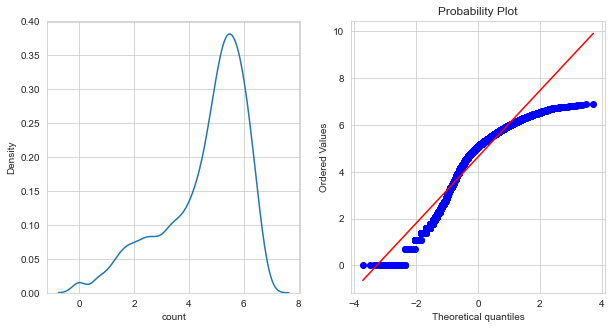

In [42]:
no_of_users_in_weather_1_transformed = np.log(no_of_users_in_weather_1)
no_of_users_in_weather_2_transformed = np.log(no_of_users_in_weather_2)
no_of_users_in_weather_3_transformed = np.log(no_of_users_in_weather_3)
normality(no_of_users_in_weather_1_transformed)

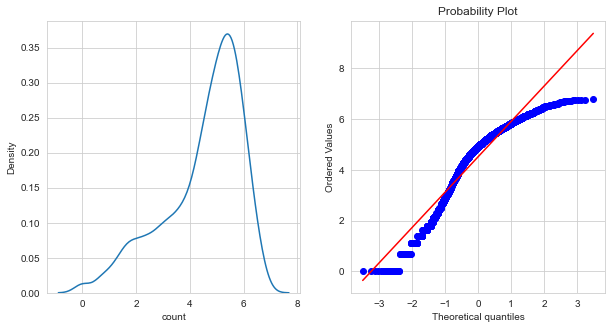

In [43]:
normality(no_of_users_in_weather_2_transformed)

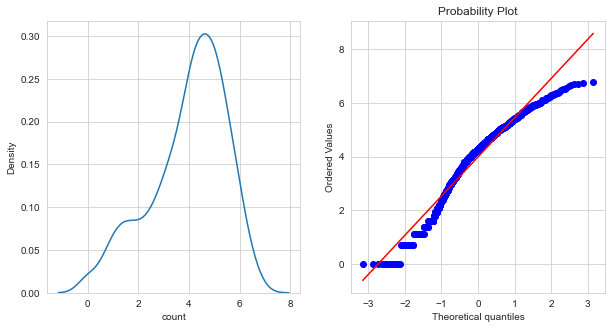

In [44]:
normality(no_of_users_in_weather_3_transformed)

### Calculating p-value using ANOVA for season

In [45]:
f_oneway(no_of_users_in_weather_1_transformed,no_of_users_in_weather_2_transformed,no_of_users_in_weather_3_transformed,no_of_users_in_weather_4)

F_onewayResult(statistic=3923.0472101359965, pvalue=0.0)

<div class="alert alert-block alert-success">
<b>Conclusion:</b> Based on above result p-value = 0.0 which is much smaller than our significance value alpha. So based on this
    We can say that we reject the Null Hypothesis. It means that there is an impact of weather on number of vehicles rented.
</div>

### Chi square test to check whether season and weather are independent of each other or not


### Hypothesis Formulation and test selection
- We'll have the following hypothesis
    - Null Hypothesis: Weather and season are independent of each other
    - Alternate Hypothesis: Weather and season are dependent on each other.
    - We'll consider the significance value as 5% and perform chi square test for independence.
- Test Selection
    - We'll use 2 sample Chi sqaure test for independence since we have categorical variables having two or more categories and we need to check whether they are dependent on each other or not.

### Test Assumption
- Since chi square is a non parametric test, it doesn't have any assumptions.

### Calculating p-value for chi-square test to check independence of season and weather

In [46]:
s1 = df[df['season']==1]['weather'].astype('string').value_counts().to_list()
s2 = df[df['season']==2]['weather'].astype('string').value_counts().to_list()
s3 = df[df['season']==3]['weather'].astype('string').value_counts().to_list()
s4 = df[df['season']==4]['weather'].astype('string').value_counts().to_list()
print(len(s1))
print(len(s2))
print(len(s3))
print(len(s4))

4
3
3
3


In [49]:
s1

[1759, 715, 211, 1]

In [91]:
s2.append(0)
s3.append(0)
s4.append(0)

In [93]:
contingency_table = [s1,s2,s3,s4]
contingency_table

[[1759, 715, 211, 1],
 [1801, 708, 224, 0],
 [1930, 604, 199, 0],
 [1702, 807, 225, 0]]

In [94]:

stat, p, dof, expected = chi2_contingency(contingency_table)
print("p value is {}".format(p))

p value is 1.549925073686492e-07


<div class="alert alert-block alert-success">
<b>Conclusion:</b> Based on above result p-value = 1.54^(-7) which is much smaller than our significance value alpha. So based on this
    We can say that we reject the Null Hypothesis. It means that weather and season are dependent of each other</div>